In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
from matplotlib import pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

import camb
from camb import model, initialpower
import pandas as pd

In [2]:
cosm = pd.read_csv("cosmologies.dat", sep='\s+')

In [3]:
#z0 = 2
#z3 = 2.10042

z0 = 0
z3 = 0

In [4]:
def kp(mlc, z):
    """
    Return scale factor axis and power spectrum,
    given a row of Aletheia parameters and a single redshift.
    This function always assumes massless neutrinos.
    """
    pars = camb.CAMBparams()
    pars.set_cosmology(
        H0=mlc["h"] * 100,
        ombh2=mlc["ombh2"],
        omch2=mlc["omch2"],
        omk=mlc["OmK"],
        mnu=0,
        num_massive_neutrinos=0
    )
    pars.InitPower.set_params(As=mlc["A_s"], ns=mlc["n_s"])
    pars.set_dark_energy(w=mlc["w0"], wa=float(mlc["wa"]), dark_energy_model='ppf')
    pars.set_matter_power(redshifts=np.array([z]), kmax=10.0,
        nonlinear=False)
    results = camb.get_results(pars)
    results.calc_power_spectra(pars)

    k, z, p = results.get_matter_power_spectrum(
        minkh=1e-4, maxkh=10.0, npoints = 10000,
        var1=8, var2=8
    )

    return k, p[0]

In [5]:
row0 = cosm.loc[0]
row3 = cosm.loc[3]

k0, p0 = kp(row0, z0)
k3, p3 = kp(row3, z3)

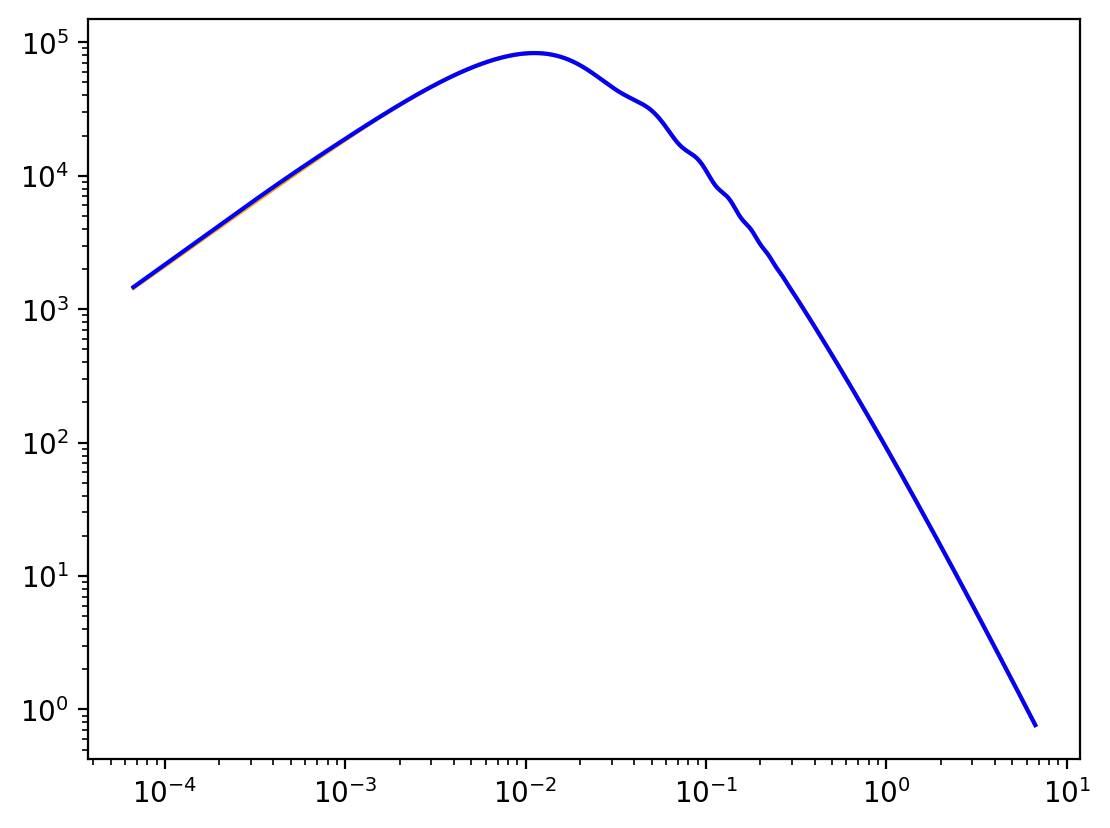

In [6]:
i = 3
snap_index = 0

baseline_h = row0["h"]
baseline_k = k0 * baseline_h
baseline_p = p0 / baseline_h ** 3

this_h = row3["h"]
this_k = k3 * this_h
this_p = p3 / this_h ** 3

plt.loglog(baseline_k, baseline_p, c="orange")
plt.loglog(this_k, this_p, c="blue")

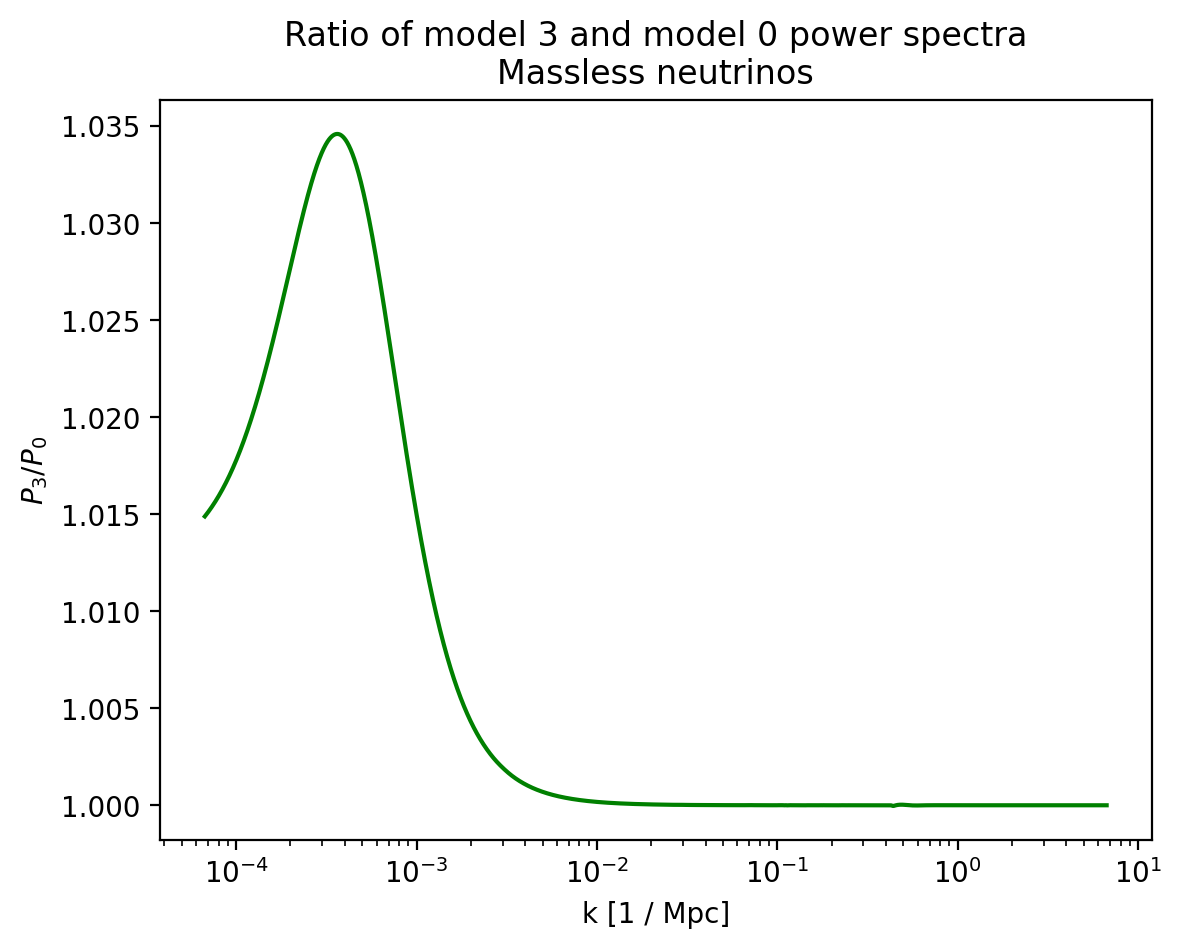

In [7]:
plt.plot(this_k, this_p / baseline_p, c="green")
plt.title("Ratio of model 3 and model 0 power spectra\nMassless neutrinos")
plt.ylabel(r"$P_3 / P_0$")
plt.xlabel("k [1 / Mpc]")
plt.xscale("log")

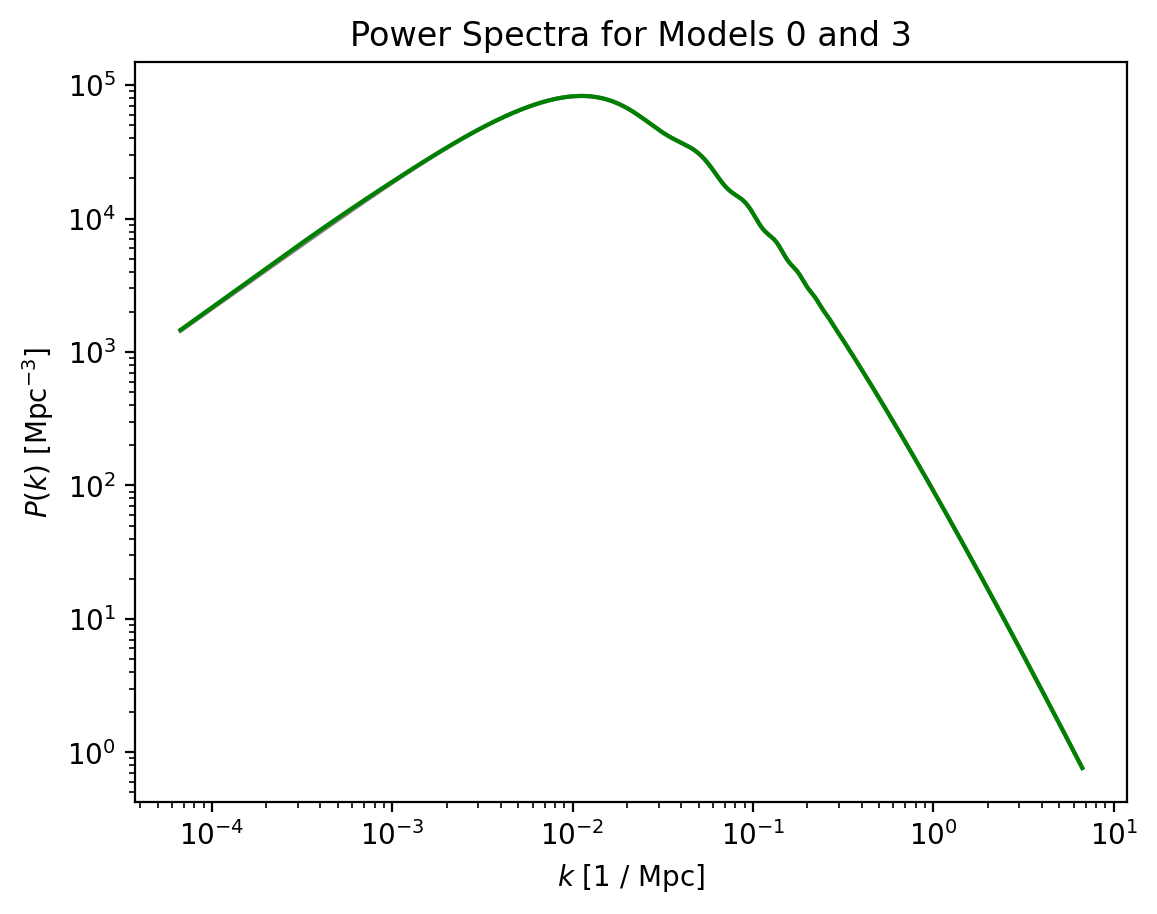

In [9]:
plt.plot(baseline_k, baseline_p,c="gray")
plt.plot(this_k, this_p,c="green")

plt.title("Power Spectra for Models 0 and 3")
plt.ylabel(r"$P(k)$ [Mpc$^{-3}$]")
plt.yscale('log')
plt.xlabel("$k$ [1 / Mpc]")
plt.xscale("log")